In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('./data/happiness_train_complete.csv', encoding='gbk')
df_test = pd.read_csv('./data/happiness_test_complete.csv', encoding='gbk')

In [3]:
#查
df_train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,...,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,...,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,...,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,...,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,...,2,50,50,50,50,50.0,50,50,50,50


In [4]:
df_train.isnull().sum()
# df_test.isnull().sum()

id                         0
happiness                  0
survey_type                0
province                   0
city                       0
county                     0
survey_time                0
gender                     0
birth                      0
nationality                0
religion                   0
religion_freq              0
edu                        0
edu_other               7997
edu_status              1120
edu_yr                  1972
income                     0
political                  0
join_party              7176
floor_area                 0
property_0                 0
property_1                 0
property_2                 0
property_3                 0
property_4                 0
property_5                 0
property_6                 0
property_7                 0
property_8                 0
property_other          7934
                        ... 
m_political                0
m_work_14                  0
status_peer                0
status_3_befor

In [5]:
#查看lable的分布
y_train=df_train["happiness"]
y_train.value_counts()

 4    4818
 5    1410
 3    1159
 2     497
 1     104
-8      12
Name: happiness, dtype: int64

In [6]:
#处理异常值
df_train = df_train.loc[df_train['happiness'] != -8]



In [7]:
df_train.describe()


,id,happiness,survey_type,province,city,county,gender,birth,nationality,religion,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
count,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.00000,7988.000000,7988.000000,7988.000000,7988.000000,...,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000
mean,4001.603906,3.867927,1.405984,15.161617,42.583250,70.64647,1.530295,1964.702303,1.374061,0.776915,...,3.723335,70.840260,68.214572,62.787932,66.346895,62.821670,67.090761,66.120931,65.651352,67.188408
std,2309.864374,0.818717,0.491112,8.915476,27.184344,38.73718,0.499113,16.848414,1.529899,1.053975,...,1.142888,21.156018,20.500041,24.723590,22.028845,23.440032,21.566658,23.065318,23.803476,22.472591
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1921.000000,-8.000000,-8.000000,...,-8.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,2001.750000,4.000000,1.000000,7.000000,18.000000,37.00000,1.000000,1952.000000,1.000000,1.000000,...,3.000000,60.000000,60.000000,50.000000,60.000000,55.750000,60.000000,60.000000,60.000000,60.000000
50%,4003.500000,4.000000,1.000000,15.000000,42.000000,73.00000,2.000000,1965.000000,1.000000,1.000000,...,4.000000,79.500000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
75%,6002.250000,4.000000,2.000000,22.000000,65.000000,104.00000,2.000000,1977.000000,1.000000,1.000000,...,5.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
max,8000.000000,5.000000,2.000000,31.000000,89.000000,134.00000,2.000000,1997.000000,8.000000,1.000000,...,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


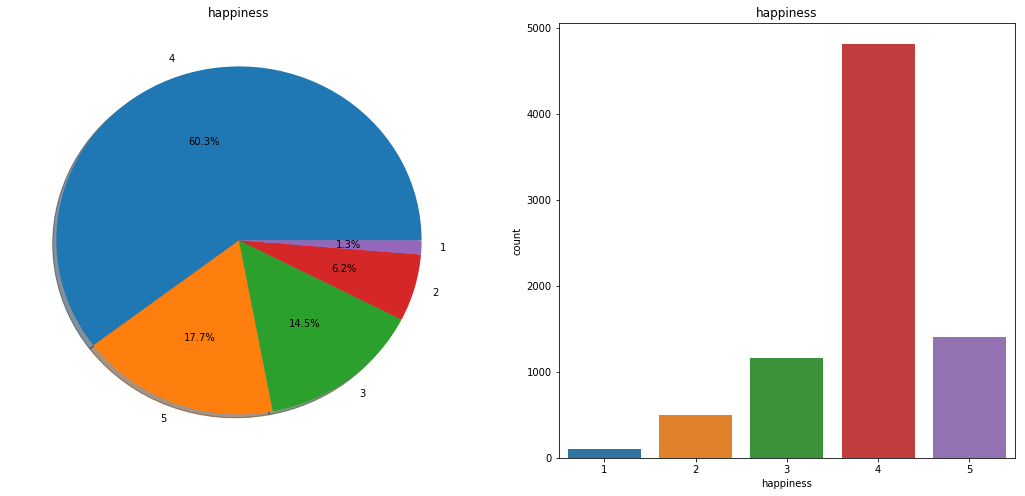

In [8]:
#查看分布情况
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['happiness'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('happiness')
ax[0].set_ylabel('')
sns.countplot('happiness',data=df_train,ax=ax[1])
ax[1].set_title('happiness')
plt.show()

In [9]:
#将训练数据和测试数据连在一起
total = pd.concat((df_train,df_test)).reset_index(drop=True)

In [10]:
#数据进行处理
total=total[total["happiness"]!=-8]
i=1
total["public_service"]=0

while i<10:                                                                                                                                                                                                                                                                                                                                                                                                                                                
    total["public_service"]=total["public_service"]+total["public_service_"+str(i)]
#     data_t["public_service"]=data_train["public_service"]+data_train["public_service_"+str(i)]
    total=total.drop(["public_service_"+str(i)],axis=1)
    i=i+1

In [11]:
i=1
total["trust"]=0
while i<14:
    total["trust"]=total["trust"]+total["trust_"+str(i)]
    total=total.drop(["trust_"+str(i)],axis=1)
    i+=1

In [12]:
i=0
total["invest"]=0
while i<9:
    total["invest"]=total["invest"]+total["invest_"+str(i)]
    total=total.drop(["invest_"+str(i)],axis=1)
    i+=1

In [13]:
i=1
total["insur"]=0
while i<5:
    total["insur"]=total["insur"]+total["insur_"+str(i)]
    total=total.drop(["insur_"+str(i)],axis=1)
    i+=1

In [14]:
i=1
total["leisure"]=0
while i<13:
    total["leisure"]=total["leisure"]+total["leisure_"+str(i)]
    total=total.drop(["leisure_"+str(i)],axis=1)
    i+=1

In [15]:
i=1
total["media"]=0
while i<7:
    total["media"]=total["media"]+total["media_"+str(i)]
    total=total.drop(["media_"+str(i)],axis=1)
    i+=1

In [16]:
i=0
total["property"]=0
while i<9:
    total["property"]=total["property"]+total["property_"+str(i)]
    total=total.drop(["property_"+str(i)],axis=1)
    i+=1

In [17]:
total.to_csv('total.csv', index=None)


In [18]:
data_train=total[total["id"]<8001]


In [19]:
data_test=total[total["id"]>8000]


In [20]:
data_test.isnull().sum()


birth                 0
car                   0
city                  0
class                 0
class_10_after        0
class_10_before       0
class_14              0
county                0
daughter              0
depression            0
edu                   0
edu_other          2965
edu_status          449
edu_yr              784
equity                0
f_birth               0
f_edu                 0
f_political           0
f_work_14             0
family_income         0
family_m              0
family_status         0
floor_area            0
gender                0
happiness          2968
health                0
health_problem        0
height_cm             0
house                 0
hukou                 0
                   ... 
s_edu               649
s_hukou             649
s_income            649
s_political         649
s_work_exper        649
s_work_status      2009
s_work_type        2009
socia_outing          0
social_friend       301
social_neighbor     301
socialize       

In [21]:
#缺失值填充
miss_data = data_train.isnull().sum().sort_values(ascending=False)  # 缺失值数量
total_miss = data_train.isnull().count()  # 总数量
miss_data_tmp = (miss_data / total_miss).sort_values(ascending=False)  # 缺失值占比
# 添加百分号
def precent(X):
    X = '%.2f%%' % (X * 100)
    return X
miss_precent = miss_data_tmp.map(precent)
# 根据缺失值占比倒序排序
miss_data_precent = pd.concat([total_miss, miss_precent, miss_data_tmp], axis=1, keys=[
                              'total', 'Percent', 'Percent_tmp']).sort_values(by='Percent_tmp', ascending=False)
# 有缺失值的变量打印出来
print(miss_data_precent[miss_data_precent['Percent'] != '0.00%'])
#* 将缺失值比例大于15%的数据全部删除，剩余数值型变量用众数填充、类别型变量用None填充。*

drop_columns = miss_data_precent[miss_data_precent['Percent_tmp'] > 0.15].index
data_train = data_train.drop(drop_columns, axis=1)
data_test = data_test.drop(drop_columns, axis=1)


                 total Percent  Percent_tmp
edu_other         7988  99.96%     0.999624
invest_other      7988  99.64%     0.996370
property_other    7988  99.17%     0.991738
join_party        7988  89.70%     0.896970
s_work_status     7988  67.95%     0.679519
s_work_type       7988  67.95%     0.679519
work_yr           7988  63.12%     0.631197
work_type         7988  63.12%     0.631197
work_status       7988  63.12%     0.631197
work_manage       7988  63.12%     0.631197
edu_yr            7988  24.66%     0.246620
marital_now       7988  22.13%     0.221332
s_work_exper      7988  21.48%     0.214822
s_birth           7988  21.48%     0.214822
s_edu             7988  21.48%     0.214822
s_hukou           7988  21.48%     0.214822
s_political       7988  21.48%     0.214822
s_income          7988  21.48%     0.214822
edu_status        7988  14.02%     0.140210
minor_child       7988  13.33%     0.133325
marital_1st       7988  10.35%     0.103530
social_neighbor   7988   9.95%  

In [22]:
data_test=data_test.drop(["happiness"],axis=1)


In [23]:
data_test.isnull().sum().sort_values(ascending=False)


edu_status              449
minor_child             382
marital_1st             301
social_neighbor         301
social_friend           301
house                     0
height_cm                 0
health_problem            0
hukou                     0
f_work_14                 0
health                    0
gender                    0
hukou_loc                 0
floor_area                0
family_status             0
family_m                  0
id                        0
family_income             0
property                  0
f_political               0
inc_exp                   0
f_edu                     0
f_birth                   0
equity                    0
edu                       0
depression                0
daughter                  0
county                    0
class_14                  0
class_10_before           0
                       ... 
income                    0
media                     0
leisure                   0
insur                     0
invest              

In [24]:
# 类别型变量
class_variable = [
    col for col in data_test.columns if data_train[col].dtypes == 'O']
# 数值型变量
numerical_variable = [
    col for col in data_test.columns if data_train[col].dtypes != 'O']  # 大写o
print('类别型变量:%s' % class_variable, '数值型变量:%s' % numerical_variable)

# 数值型变量用中位数填充，test集中最后一列为预测价格，所以不可以填充
from sklearn.preprocessing import Imputer
# #Imputer填充模块
padding = Imputer(strategy='most_frequent')
data_train[numerical_variable] = padding.fit_transform(data_train[numerical_variable])

data_test[numerical_variable] = padding.fit_transform(data_test[numerical_variable])
# 类别变量用None填充
data_train[class_variable] = data_train[class_variable].fillna('None')
data_test[class_variable] = data_test[class_variable].fillna('None')


类别型变量:['survey_time'] 数值型变量:['birth', 'car', 'city', 'class', 'class_10_after', 'class_10_before', 'class_14', 'county', 'daughter', 'depression', 'edu', 'edu_status', 'equity', 'f_birth', 'f_edu', 'f_political', 'f_work_14', 'family_income', 'family_m', 'family_status', 'floor_area', 'gender', 'health', 'health_problem', 'height_cm', 'house', 'hukou', 'hukou_loc', 'id', 'inc_ability', 'inc_exp', 'income', 'learn', 'm_birth', 'm_edu', 'm_political', 'm_work_14', 'marital', 'marital_1st', 'minor_child', 'nationality', 'neighbor_familiarity', 'political', 'province', 'relax', 'religion', 'religion_freq', 'socia_outing', 'social_friend', 'social_neighbor', 'socialize', 'son', 'status_3_before', 'status_peer', 'survey_type', 'view', 'weight_jin', 'work_exper', 'public_service', 'trust', 'invest', 'insur', 'leisure', 'media', 'property']


In [25]:
data_train['survey_time'] = pd.to_datetime(data_train['survey_time'])


In [26]:
import datetime as dt
data_train['survey_time'] = data_train['survey_time'].dt.year


In [27]:
#添加年龄特征
data_train['age']=data_train['survey_time']-data_train['birth']


In [28]:
#查看数据
data_train.head()


,birth,car,city,class,class_10_after,class_10_before,class_14,county,daughter,depression,...,weight_jin,work_exper,public_service,trust,invest,insur,leisure,media,property,age
0,1959.0,2.0,32.0,3.0,3.0,3.0,1.0,59.0,0.0,5.0,...,155.0,1.0,420.0,7.0,1.0,5.0,33.0,23.0,1.0,56.0
1,1992.0,2.0,52.0,6.0,8.0,4.0,5.0,85.0,0.0,3.0,...,110.0,1.0,675.0,43.0,1.0,4.0,39.0,14.0,1.0,23.0
2,1967.0,2.0,83.0,5.0,6.0,4.0,3.0,126.0,2.0,5.0,...,122.0,2.0,749.0,27.0,1.0,6.0,45.0,15.0,2.0,48.0
3,1943.0,1.0,28.0,5.0,7.0,5.0,2.0,51.0,4.0,4.0,...,170.0,4.0,760.0,44.0,1.0,8.0,43.0,11.0,1.0,72.0
4,1994.0,1.0,18.0,1.0,1.0,1.0,4.0,36.0,0.0,3.0,...,110.0,6.0,450.0,44.0,1.0,7.0,40.0,20.0,1.0,21.0


In [29]:
data_test['survey_time'] = pd.to_datetime(data_test['survey_time'])
data_test['survey_time'] = data_test['survey_time'].dt.year
data_test['age']=data_test['survey_time']-data_test['birth']


In [30]:
total=[data_train,data_test]


In [31]:
#把年龄分为多个阶段
for data in total:
    data.loc[data['age']<=20,'age']=0
    data.loc[(data['age'] > 20) & (data['age'] <= 40), 'age'] = 1
    data.loc[(data['age'] > 40) & (data['age'] <= 60), 'age'] = 2
    data.loc[(data['age'] > 60) & (data['age'] <= 80), 'age'] = 3
    data.loc[ data['age'] > 80, 'age'] = 4
    

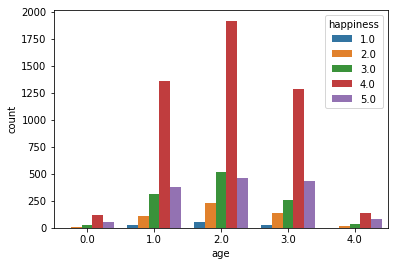

In [32]:
sns.countplot('age',hue='happiness',data=data_train)


In [33]:
data_train=data_train[data_train['happiness']>0]


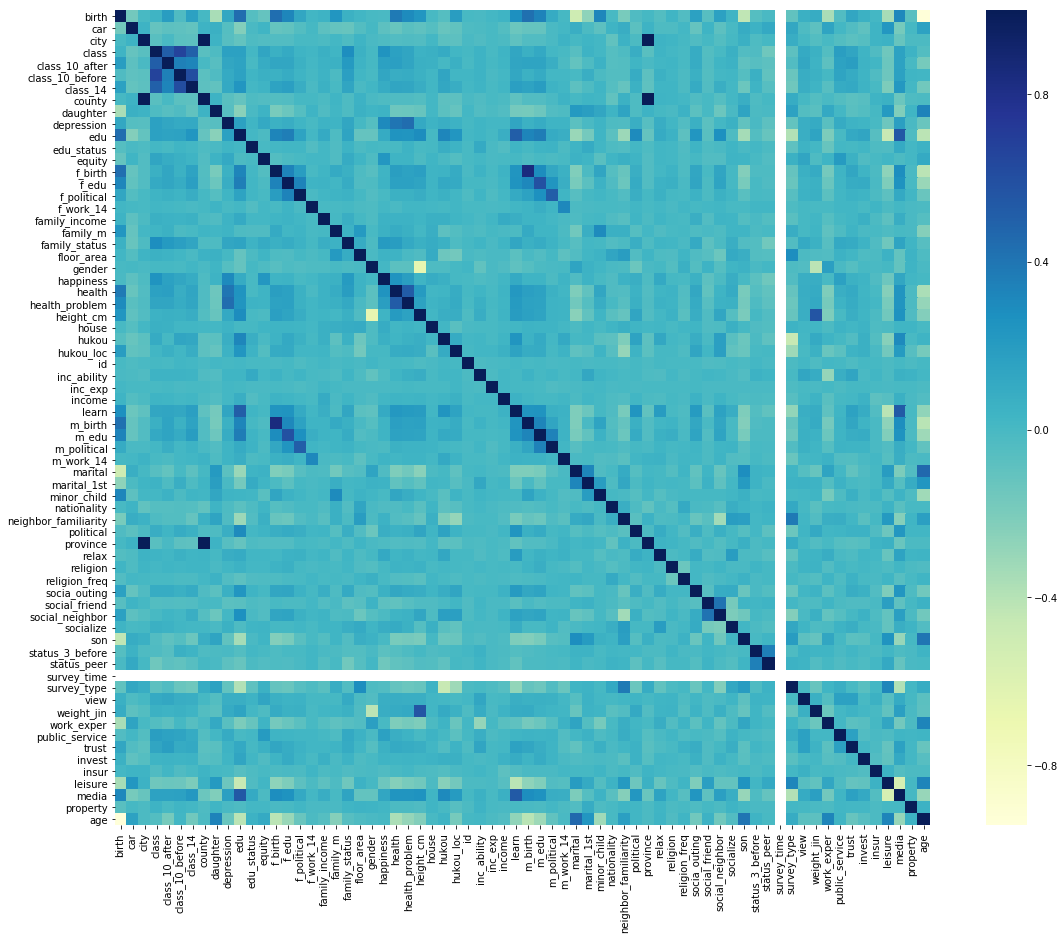

In [34]:
#相关性矩阵
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, square=True,cmap='YlGnBu');


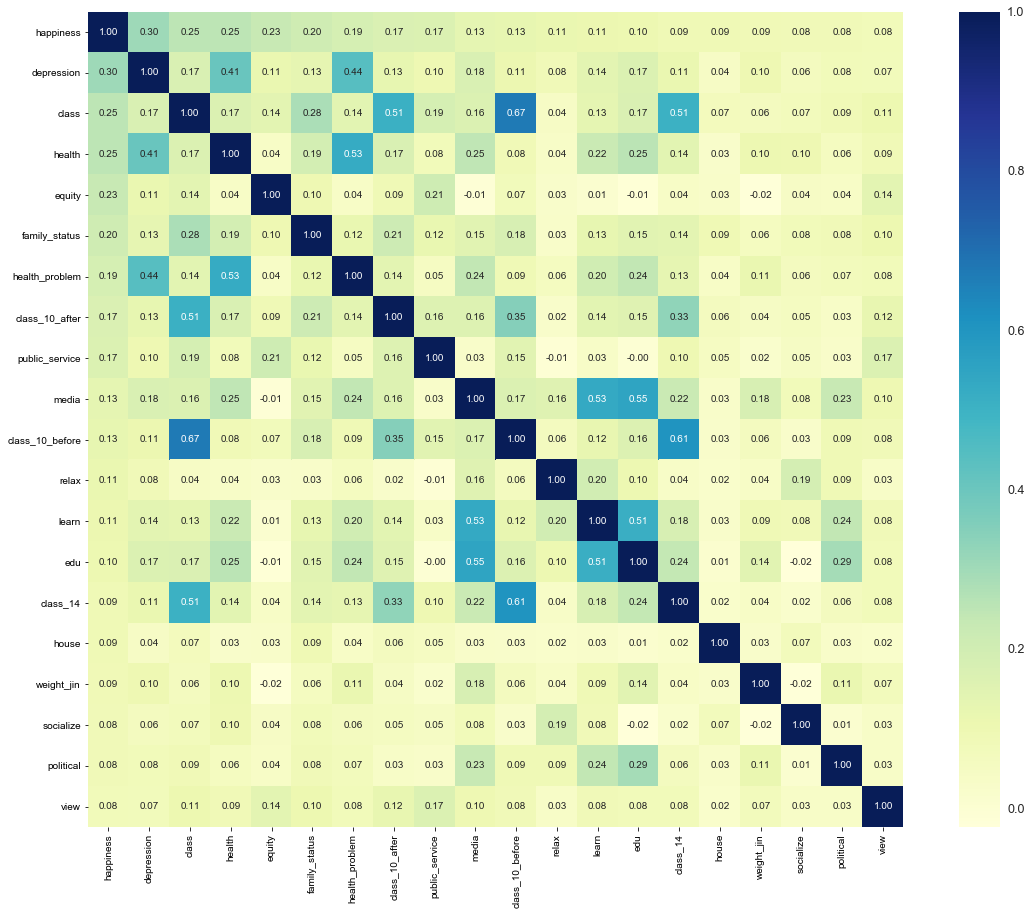

In [35]:
#查看与happiness较相关的20个特征
data_train=data_train[data_train["happiness"]!=-8]
k = 20#number of variables for heatmap
corrmat = data_train.corr()
cols = corrmat.nlargest(k, "happiness")["happiness"].index
cm = np.corrcoef(data_train[cols].values.T)
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10
                                                                              }, yticklabels=cols.values, xticklabels=cols.values,cmap='YlGnBu')
plt.show()


In [36]:
y=data_train.happiness
ind =['depression','class','health','equity','family_status','health_problem','edu','house','weight_jin','age',"class_10_after","public_service","media","class_10_before","relax","learn","class_14","socialize","political","view"]
x=data_train[ind]
x_test_data=data_test[ind]

In [41]:
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.externals import joblib
kfold = KFold(n_splits=15, shuffle = True, random_state= 12)
model = CatBoostRegressor(colsample_bylevel=0.1,thread_count=6,silent=True,iterations=800, 
                          depth=5, 
                          learning_rate=0.051, 
                          loss_function='RMSE',
                          l2_leaf_reg = 3)
mse = []
i=0
for train, test in kfold.split(x):
    X_train = x.iloc[train]
    y_train = y.iloc[train]
    X_test = x.iloc[test]
    y_test = y.iloc[test]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    err = mean_squared_error(y_true=y_test,y_pred=y_pred)
    mse.append(err)
    print(err)
    joblib.dump(filename="cat"+str(i),value=model)
    i+=1
print("catboost",np.mean(mse),mse)

0.520242045698
0.502911306456
0.487965514286
0.475627013183
0.460359255502
0.427548771569
0.464094992581
0.526959070738
0.396411952105
0.439739357713
0.558822412297
0.49412979921
0.461442630814
0.475754478745
0.453308400907
catboost 0.476354466787 [0.52024204569777277, 0.50291130645603443, 0.4879655142861643, 0.4756270131832589, 0.46035925550243273, 0.42754877156932969, 0.46409499258110848, 0.52695907073844261, 0.39641195210451263, 0.4397393577127548, 0.55882241229728846, 0.49412979920954037, 0.46144263081423098, 0.47575447874534738, 0.45330840090665842]


In [43]:
#xgboost
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib
from sklearn.model_selection import KFold
kfold = KFold(n_splits=15, shuffle = True, random_state= 11)
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.1,
       colsample_bytree=0.971, gamma=0.11, learning_rate=0.069, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=499,
       n_jobs=-1, nthread=50, objective='reg:linear', random_state=0,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)
mse = []
i = 0
for train, test in kfold.split(x):
    X_train = x.iloc[train]
    y_train = y.iloc[train]
    X_test = x.iloc[test]
    y_test = y.iloc[test]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    xg_mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
    mse.append(xg_mse)
    print("xgboost",xg_mse)
    joblib.dump(filename="xg"+str(i),value=model)
    i+=1
print("xgboost",np.mean(mse),mse)

xgboost 0.549063477994
xgboost 0.485447827639
xgboost 0.494727898969
xgboost 0.499969744401
xgboost 0.428354806913
xgboost 0.508715579836
xgboost 0.457184471403
xgboost 0.509058479833
xgboost 0.464640825136
xgboost 0.522659556286
xgboost 0.429337870798
xgboost 0.481341920321
xgboost 0.411221436693
xgboost 0.490305200981
xgboost 0.496389159033
xgboost 0.481894550416 [0.5490634779943695, 0.48544782763864497, 0.49472789896932345, 0.49996974440055081, 0.42835480691310501, 0.50871557983583093, 0.4571844714028282, 0.50905847983332575, 0.4646408251358991, 0.52265955628605731, 0.42933787079767488, 0.48134192032059897, 0.41122143669255484, 0.490305200981275, 0.49638915903296527]


In [44]:
#gbdt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib
from sklearn.model_selection import KFold
kfold = KFold(n_splits=15, shuffle = True, random_state= 12)
model = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.051, loss='ls', max_depth=4, max_features=10,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, presort='auto', random_state=3,
             subsample=0.98, verbose=0, warm_start=False)

mse = []
i = 0
for train, test in kfold.split(x):
    X_train = x.iloc[train]
    y_train = y.iloc[train]
    X_test = x.iloc[test]
    y_test = y.iloc[test]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    gbdt_mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
    mse.append(gbdt_mse)
    print("gbdt",gbdt_mse)
    joblib.dump(filename="gbdt"+str(i),value=model)
    i+=1
print("gbdt",np.mean(mse),mse)




gbdt 0.53884725003
gbdt 0.52730237575
gbdt 0.505551267047
gbdt 0.489040001112
gbdt 0.470740123183
gbdt 0.460268162079
gbdt 0.467260367746
gbdt 0.539235848496
gbdt 0.399782808325
gbdt 0.450424786048
gbdt 0.566907697738
gbdt 0.509376290155
gbdt 0.469348581821
gbdt 0.490614180395
gbdt 0.481080340101
gbdt 0.491052005335 [0.53884725002974931, 0.52730237574952388, 0.50555126704711306, 0.48904000111176021, 0.47074012318299724, 0.4602681620785064, 0.4672603677460071, 0.539235848496186, 0.39978280832486218, 0.45042478604792346, 0.56690769773799987, 0.50937629015453911, 0.46934858182085293, 0.49061418039519106, 0.48108034010077594]


In [46]:
#带权平均融合CatBoostRegressor + xgboost + gbdt现有模型
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.externals import joblib
kfold = KFold(n_splits=10, shuffle = True, random_state= 110)
catmse = []
xgmse = []
gbdtmse = []
lrmse = []
i = 0
for train, test in kfold.split(x):
    X_train = x.iloc[train]
    y_train = y.iloc[train]
    X_test = x.iloc[test]
    y_test = y.iloc[test]
    model.fit(X_train,y_train)
    
    cat = joblib.load(filename="cat"+str(i))
#     light = joblib.load(filename="light"+str(i))
    xg = joblib.load(filename="xg"+str(i))
    gbdt = joblib.load(filename="gbdt"+str(i))
    
    catX = cat.predict(X_test)
    cat_mse = mean_squared_error(y_true=y_test,y_pred=catX)
    print("\ncat mse:",cat_mse)
    catmse.append(cat_mse)
    
    
    xgX = xg.predict(X_test)
    xg_mse = mean_squared_error(y_true=y_test,y_pred=xgX)
    print("xg mse:",xg_mse)
    xgmse.append(xg_mse)
    
    X_test2 = X_test.fillna(-8)
    gbdtX = gbdt.predict(X_test2)
    gbdt_mse = mean_squared_error(y_true=y_test,y_pred=gbdtX)
    print("gbdt mse:",gbdt_mse)
    gbdtmse.append(gbdt_mse)
    
    res = np.c_[catX,xgX,gbdtX]
    e = np.array([1/cat_mse,1/xg_mse,1/gbdt_mse])
    y_pred = np.sum(res*e,axis=1)/sum(e)
    lr_mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
    print("lr mse:",lr_mse)
    lrmse.append(lr_mse)
    
    i+=1
    
print("\n\ncatmse:",np.mean(catmse))
# print("lightmse:",np.mean(lightmse))
print("xgmse:",np.mean(xgmse))
print("gbdtmse:",np.mean(gbdtmse))
print("lrmse:",np.mean(lrmse))

cat = CatBoostRegressor(colsample_bylevel=0.1,thread_count=6,silent=True,iterations=800, 
                          depth=5, 
                          learning_rate=0.051, 
                          loss_function='RMSE',
                          l2_leaf_reg = 3)
xg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.1,
       colsample_bytree=0.971, gamma=0.11, learning_rate=0.069, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=499,
       n_jobs=-1, nthread=50, objective='reg:linear', random_state=0,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)
gbdt = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.051, loss='ls', max_depth=4, max_features=10,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, presort='auto', random_state=3,
             subsample=0.98, verbose=0, warm_start=False)
cat.fit(x,y)
xg.fit(x,y)
gbdt.fit(x.fillna(-8),y)




cat mse: 0.424217149051
xg mse: 0.422101786433
gbdt mse: 0.325318313659
lr mse: 0.375789119882

cat mse: 0.424179303748
xg mse: 0.425185828075
gbdt mse: 0.320646656881
lr mse: 0.374233908542

cat mse: 0.391463899729
xg mse: 0.386459509782
gbdt mse: 0.291857390828
lr mse: 0.342898241744

cat mse: 0.451036182765
xg mse: 0.445345034919
gbdt mse: 0.341735147588
lr mse: 0.398020619828

cat mse: 0.390465752399
xg mse: 0.391228865774
gbdt mse: 0.304900797496
lr mse: 0.350654161261

cat mse: 0.428926605425
xg mse: 0.430810557002
gbdt mse: 0.319981124072
lr mse: 0.375535817412

cat mse: 0.397218280213
xg mse: 0.392370863228
gbdt mse: 0.306126728315
lr mse: 0.352784451872

cat mse: 0.443826696366
xg mse: 0.444126091686
gbdt mse: 0.346364038769
lr mse: 0.398659969129

cat mse: 0.473014613655
xg mse: 0.469846134434
gbdt mse: 0.354201166461
lr mse: 0.416548327568

cat mse: 0.487379024425
xg mse: 0.48725566755
gbdt mse: 0.377283431076
lr mse: 0.435910142194


catmse: 0.431172750778
xgmse: 0.4294730

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.051, loss='ls', max_depth=4, max_features=10,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, presort='auto', random_state=3,
             subsample=0.98, verbose=0, warm_start=False)

In [54]:
#LR 融合CatBoostRegressor + LightGBM + xgboost + gbdt现有模型

from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
kfold = KFold(n_splits=15, shuffle = True, random_state= 12)
catmse = []
xgmse = []
gbdtmse = []
lrmse = []
i = 0
for train, test in kfold.split(x):
    X_train = x.iloc[train]
    y_train = y.iloc[train]
    X_test = x.iloc[test]
    y_test = y.iloc[test]
#     model.fit(X_train,y_train)
    
    catX = cat.predict(X_test)
    cat_mse = mean_squared_error(y_true=y_test,y_pred=catX)
    print("\ncat mse:",cat_mse)
    catmse.append(cat_mse)
    
    xgX = xg.predict(X_test)
    xg_mse = mean_squared_error(y_true=y_test,y_pred=xgX)
    print("xg mse:",xg_mse)
    xgmse.append(xg_mse)
    
    gbdtX = gbdt.predict(X_test.fillna(-8))
    gbdt_mse = mean_squared_error(y_true=y_test,y_pred=gbdtX)
    print("gbdt mse:",gbdt_mse)
    gbdtmse.append(gbdt_mse)
    
    res = np.c_[catX,xgX,gbdtX]
    lr = Ridge(fit_intercept=False, alpha=75)
    lr.fit(res,y_test)
    print(lr.coef_)

    y_pred = lr.predict(res)
    lr_mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
    print("lr mse:",lr_mse)
    lrmse.append(lr_mse)
    joblib.dump(filename="lr"+str(i),value=lr)
    i+=1
    
print("\ncatmse:",np.mean(catmse))
print("\n\nlightmse:",np.mean(lightmse))
print("xgmse:",np.mean(xgmse))
print("gbdtmse:",np.mean(gbdtmse))
print("lrmse:",np.mean(lrmse))

    
prediction = []
for i in range(15):
  
    catX = cat.predict(x_test_data)
    xgX = xg.predict(x_test_data)
    gbdtX = gbdt.predict(x_test_data.fillna(-8))
    res = np.c_[catX,xgX,gbdtX]
    prediction.append(lr.predict(res))
    
a = np.array(prediction)
def cut(arr):
    arr2 = []
    for x in arr:
        if x<1:
            arr2.append(1)
        elif x>5:
            arr2.append(5)
        else :
            arr2.append(x)
    return arr2
# x_test=x_test_data[["id"]]
# x_test["happiness"] = np.mean(np.array(prediction),axis=0)
# x_test_data.to_csv("happiness_submit.csv",index=False)
df = pd.DataFrame({'id':df_test.id, 'happniess': np.mean(np.array(prediction))})
df.to_csv('happiness_submit.csv', index=None)
print("done")


# out["happiness"] = cut(np.sum((1/np.array(lrmse)*a.T),axis=1)/np.sum(1/np.array(lrmse)))
# out.to_csv("happiness_submit.csv",index=False)
print("done")


cat mse: 0.520242045698
xg mse: 0.459595780684
gbdt mse: 0.340549508502
[ 0.1006678   0.25399539  0.64597741]
lr mse: 0.378959622411

cat mse: 0.450306213831
xg mse: 0.460809179721
gbdt mse: 0.350231755288
[ 0.22992697  0.198508    0.57120111]
lr mse: 0.38861002767

cat mse: 0.445513163911
xg mse: 0.443125396502
gbdt mse: 0.354863935703
[ 0.22522903  0.23793618  0.53834565]
lr mse: 0.389946758559

cat mse: 0.43381872634
xg mse: 0.427794082588
gbdt mse: 0.322357139198
[ 0.20400183  0.22649861  0.57851434]
lr mse: 0.359220342339

cat mse: 0.4048957624
xg mse: 0.41587009166
gbdt mse: 0.307834897229
[ 0.23780868  0.20559005  0.56698156]
lr mse: 0.341829051419

cat mse: 0.381257222931
xg mse: 0.383464417013
gbdt mse: 0.295021558507
[ 0.23212513  0.22880666  0.53056397]
lr mse: 0.329852298282

cat mse: 0.411478688455
xg mse: 0.413515551718
gbdt mse: 0.309376655932
[ 0.2158147   0.21558311  0.56576747]
lr mse: 0.347303771337

cat mse: 0.48005434885
xg mse: 0.484724958194
gbdt mse: 0.37407210